# Let's reuse the content

This notebook shows how to reuse the text extracted from the [Australian Web Archive](https://web.archive.org.au/awa/) to compute the frequency distribution of words based on the content provided by the website [DownsSteam Tourist Railway and Museum](https://downssteam.com/) as URL (https://downssteam.com/) and its different mementos.

In [12]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### We need to unzip the dataset

In [13]:
#!tar -xvzf text-nla.tar.gz 

### Now we read all the text

In [25]:
import os
from nltk.tokenize import word_tokenize

directory = os.fsencode("text-nla/com-downssteam")

#print(os.listdir(directory))
text = ""
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"): 
        print(os.path.join("text-nla/com-downssteam", filename))
        f = open(os.path.join("text-nla/com-downssteam", filename), "r")
        text = text + f.read()
#print(text)

text-nla/com-downssteam/com-downssteam-20160313232246.txt
text-nla/com-downssteam/com-downssteam-20220524141816.txt
text-nla/com-downssteam/com-downssteam-20210525080442.txt
text-nla/com-downssteam/com-downssteam-20230524140046.txt
text-nla/com-downssteam/com-downssteam-20240524151056.txt
text-nla/com-downssteam/com-downssteam-20240524140023.txt


### We create split the text into tokens

In [26]:
text_tokens = word_tokenize(text)

### We can improve the stopwords list with our own words

In [32]:
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words = stopwords.words('english') + list(string.punctuation)
print(len(stop_words))
stop_words.extend(['...', ',,', '-', '–','“','”','’'])
print(len(stop_words))

198
230
237


In [33]:
filtered_words = [word.lower() for word in text_tokens if word.lower() not in stop_words]
#print(filtered_words)

### We can compute the frequency distribution

A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document.


In [34]:
fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 614 samples and 3780 outcomes>


In [35]:
fdist.most_common(10)

[('downssteam', 108),
 ('railway', 60),
 ('toowoomba', 59),
 ('journey', 36),
 ('steam', 35),
 ('events', 33),
 ('learn', 33),
 ('pride', 32),
 ('downs', 31),
 ('tourist', 31)]

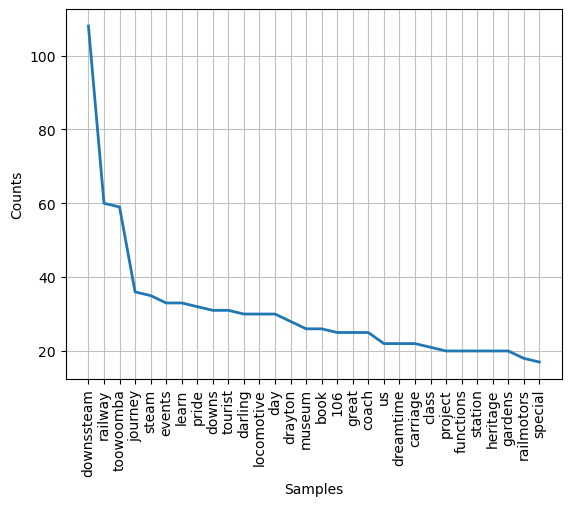

In [36]:
# Frequency Distribution Plot
fdist.plot(30)
plt.show()